### データ用意

In [3]:
import numpy as np
import pandas as pd

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [5]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8

(60000, 28, 28)
(10000, 28, 28)
uint8


In [6]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

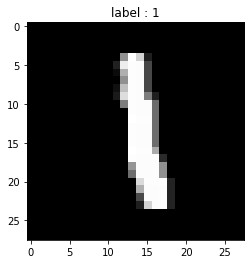

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 6
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

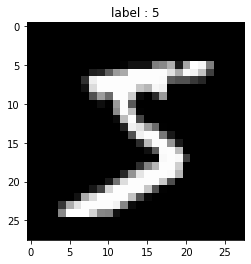

In [8]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

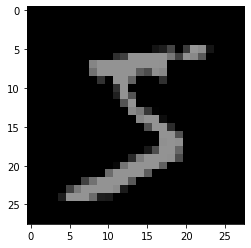

In [9]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [10]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [11]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [14]:
from sklearn.metrics import accuracy_score

## 【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。

## 【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。

## 【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。

## 【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。   
しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値   
（またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。

## 【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。


まず、これまで使ってきたSGDを確認します。

## 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。

## 【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

# FOWARD and BACKWARD

In [58]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)
        self.dB = 0
        self.dW = 0
        self.ada_W = 0
        self.ada_B = 0
        self.v_W = 0
        self.v_B = 0

        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.forward_Z = X.copy()
        A = np.dot(X, self.W) + self.B        
        
        return A
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """

        self.dB = dA
        self.dW = np.dot(self.forward_Z.T, dA)
        dZ = np.dot(dA, self.W.T)
        # 更新
        
        self.optimizer.update(self)
        
        return dZ

# ACTIVATION_FUNCTION

### SOFT_MAX

In [59]:
class Softmax_with_Loss:
    
    def __init__(self,):
        self.forword_A = None
        
    def forward(self, A):
        """
        フォワード
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        Z = np.exp(A)/(np.exp(A).sum(1).reshape(-1, 1))
        self.forword_A = Z
        
        return Z

    def backward(self, y):

        return self.forword_A - y

### HYPABOLIC_TAN

In [60]:
class Tanh:

    def __init__(self,):
        self.forword_A = None
        
    def forward(self, A):
        """
        フォワード
        Parameters
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        Z : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
         Z = np.tanh(A)
        self.forward_A = Z
        
        return Z

    def backward(self, dZ):

        return dZ*(1 - np.tanh(self.forward_A)**2)


### SIGMOID

In [61]:
class Sigmoid:
    def __init__(self):
        self.mask = None
        
    def forward(self, X):
        out = 1/(1+np.exp(-X))
        self.out = out
        return out

    def backward (self, dout):
        dx = dout*(1 - self.out)*self.out
        
        return dx

### RELU

In [62]:
class Relu:

    def __init__(self):
        self.mask = None
        
    def forward(self, X):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        self.mask = (X <= 0)
        out = X.copy()
        out[self.mask] = 0
 
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dX = dout

        return dout

# OPTIMAIZER

### SGD

In [63]:
class SGD:
    
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W = layer.W - self.lr*layer.dW
        layer.B = layer.B - self.lr*layer.dB.mean(axis = 0)

        return layer

### MOMETUM

In [64]:
class Momentum:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
#         self.v_W = None
#         self.v_B = None
        
    def update(self, layer):
        
#         from(zero tuku)
#         if self.v is None:
#             self.v = {}
#             for key, val in params.items():                                
#                 self.v[key] = np.zeros_like(val)
                
#             for key in params.keys():
#                 self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
#                 params[key] += self.v[key]

        layer.v_W = self.momentum*layer.v_W - self.lr*layer.dW
        layer.W += layer.v_W
        
        layer.v_B = self.momentum*layer.v_B - self.lr*layer.dB
        layer.B += layer.v_B.mean(0)
        
        return layer

### AdaGrad

In [65]:
class AdaGrad:
    
    def __init__(self, lr):
        self.lr = lr
#         self.h_dW = 0
#         self.h_dB = 0
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
#         from (zerotuku)
#         for key in params.keys():
#             self.h[key] += grads[key] * grads[key]
#             params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
#         print(layer.dW.shape)

        layer.ada_W += layer.dW**2
        layer.ada_B += layer.dB**2
        
        layer.W -= self.lr*layer.dW/(np.sqrt(layer.ada_W) + 1e-7)
        layer.B -= (self.lr*layer.dB/(np.sqrt(layer.ada_B) + 1e-7)).mean(0)

        return layer

### Adam

In [66]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m_W = None
        self.v_W = None
        self.m_B = None
        self.v_B = None
        
    def update(self, layer):
        
#         from(zerotuku)
#         self.iter += 1
#         lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
#         for key in params.keys():
#             #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
#             #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
#             self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
#             self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
#             params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
#             #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
#             #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
#             #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)   

        layer.ada_W += (1 - self.beta1) * (layer.dW - layer.ada_W)
        layer.v_W += (1 - self.beta2) * (layer.dW**2 - layer.v_W)
        layer.W -= lr_t * layer.ada_W / (np.sqrt(layer.v_W) + 1e-7)

        layer.ada_B += (1 - self.beta1) * (layer.dB - layer.ada_B)
        layer.v_B += (1 - self.beta2) * (layer.dB**2 - layer.v_B)
        layer.B -= (lr_t * layer.ada_B / (np.sqrt(layer.v_B) + 1e-7)).mean(0)
        
        return layer

# INITIALAIZER

### SIMPLE

In [67]:
class SimpleInitializer():
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma*np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma*np.random.randn(n_nodes2)
        return B


### Xavier

In [68]:
class Xavier:

    def __init__(self, sigma):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        coef = 1/np.sqrt(n_nodes1)
        W = coef*np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        coef = 1/np.sqrt(n_nodes2)
        B = coef*np.random.randn(n_nodes2)
        return B

### He

In [69]:
class He:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, siguma):
        self.siguma = siguma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        coef = np.sqrt(2/n_nodes1)
        W = coef*np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        coef = np.sqrt(2/n_nodes2)
        B = coef*np.random.randn(n_nodes2)
        return B

# Distoributer

In [70]:
class GetMiniBatch():
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# NEWRAL_NET_WORK

In [71]:
class ScratchSimpleNeuralNetrowkClassifier():

        def __init__(self, verbose = True, epoch = 0 , alpha = 0.01, activater = Tanh,  initializer = SimpleInitializer, optimizer = SGD):
            self.verbose = verbose
            self.n_features = 784
            self.n_nodes1 = 400
            self.n_nodes2 = 200
            self.n_output = 10
            self.sigma = 0.01   # ガウス分布の標準偏差
            self.batch_size=10
            self.loss_box = []
            self.epoch = epoch
            self.lr = alpha
            self.activater = activater
            self.initializer = initializer
            self.optimizer = optimizer
            pass

        def fit(self, X, y, X_val=None, y_val=None):

            """
            初期値
            """
            # self.sigma : ガウス分布の標準偏差
            # self.lr : 学習率
            # self.n_nodes1 : 1層目のノード数
            # self.n_nodes2 : 2層目のノード数
            # self.n_output : 出力層のノード数
            optimizer = AdaGrad(self.lr)
            self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation1 = self.activater()
            self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation2 = self.activater()
            self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation3 = Softmax_with_Loss()
            """Get_mini_batch"""
            get_mini_batch = GetMiniBatch(X, y, self.batch_size)

            """エポック回イテレート"""
            for i in range(self.epoch):
                for mini_X_train, mini_y_train in get_mini_batch:

                    """
                    Forword
                    """
                    A1 = self.FC1.forward(mini_X_train)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    """
                    Backword
                    """
                    dA3 = self.activation3.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせてい
                    dZ2 = self.FC3.backward(dA3)
                    dA2 = self.activation2.backward(dZ2)
                    dZ1 = self.FC2.backward(dA2)
                    dA1 = self.activation1.backward(dZ1)
                    dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                  
                """
                Forword  after optimized weight
                """
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                """
                Evaluation
                """
                print('__{}TIMES　of epoch__'.format(i+1))
                print('L0SS={}'.format(self.cross_entropy_loss(Z3, y)))
                print('ACCURACY_SCORE={}'.format(accuracy_score(y.argmax(1), Z3.argmax(1))))
                
                self.loss_box.append(self.cross_entropy_loss(Z3, y))

            if self.verbose:
                print()
                #verboseをTrueにした際は学習過程などを出力する
            return self.loss_box

        def cross_entropy_loss(self, final_Z, y):
            l =  -y*(np.log(final_Z))/self.batch_size
            L = l.sum()
            return L

        def predict(self, X):
            """
            Forword action after optimized weight
            """
            A1 = self.FC1.forward(X)
            Z1 = self.activation1.forward(A1)
            A2 = self.FC2.forward(Z1)
            Z2 = self.activation2.forward(A2)
            A3 = self.FC3.forward(Z2)
            Z3 = self.activation3.forward(A3)

            return Z3.argmax(1)

## Activation_function = Relu

In [73]:
%%timeit -r １ -n 1
nnc = ScratchSimpleNeuralNetrowkClassifier(epoch = 10, alpha = 0.01, activater = Relu, initializer = Xavier, optimizer = AdaGrad)

loss_box_Relu = nnc.fit(X_train[:4000], y_train[:4000])

y_pred = nnc.predict(X_val)

accuracy_score(y_val.argmax(1), y_pred)

__1TIMES　of epoch__
L0SS=75.17865600205722
ACCURACY_SCORE=0.94675
__2TIMES　of epoch__
L0SS=45.37317459109721
ACCURACY_SCORE=0.97075
__3TIMES　of epoch__
L0SS=29.818372492386935
ACCURACY_SCORE=0.98275
__4TIMES　of epoch__
L0SS=19.551696025878172
ACCURACY_SCORE=0.99175
__5TIMES　of epoch__
L0SS=12.588999245314122
ACCURACY_SCORE=0.996
__6TIMES　of epoch__
L0SS=8.363754435048463
ACCURACY_SCORE=0.998
__7TIMES　of epoch__
L0SS=5.925561661893807
ACCURACY_SCORE=0.9995
__8TIMES　of epoch__
L0SS=4.338191168460169
ACCURACY_SCORE=1.0
__9TIMES　of epoch__
L0SS=3.300131780830324
ACCURACY_SCORE=1.0
__10TIMES　of epoch__
L0SS=2.612936178881422
ACCURACY_SCORE=1.0

44.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Activation_function = Tanh

In [103]:
%%timeit -r １ -n 1
nnc = ScratchSimpleNeuralNetrowkClassifier(epoch = 10, alpha = 0.01, activater = Tanh, initializer = Xavier, optimizer = AdaGrad)

loss_box_Tanh = nnc.fit(X_train[:4000], y_train[:4000])

y_pred = nnc.predict(X_val)

accuracy_score(y_val.argmax(1), y_pred)

__1TIMES　of epoch__
L0SS=100.26399982162734
ACCURACY_SCORE=0.92875
__2TIMES　of epoch__
L0SS=72.2543818742596
ACCURACY_SCORE=0.952
__3TIMES　of epoch__
L0SS=56.07537548981322
ACCURACY_SCORE=0.9625
__4TIMES　of epoch__
L0SS=45.015154650666446
ACCURACY_SCORE=0.971
__5TIMES　of epoch__
L0SS=37.07915538136419
ACCURACY_SCORE=0.97825
__6TIMES　of epoch__
L0SS=31.091531084788997
ACCURACY_SCORE=0.985
__7TIMES　of epoch__
L0SS=26.411475560368867
ACCURACY_SCORE=0.9885
__8TIMES　of epoch__
L0SS=22.678168832238107
ACCURACY_SCORE=0.991
__9TIMES　of epoch__
L0SS=19.672883629926247
ACCURACY_SCORE=0.9925
__10TIMES　of epoch__
L0SS=17.24186114132497
ACCURACY_SCORE=0.99525

29.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Activation_function = Sigmoid

In [104]:
%%timeit -r １ -n 1
nnc = ScratchSimpleNeuralNetrowkClassifier(epoch = 10, alpha = 0.01, activater = Sigmoid, initializer = Xavier, optimizer = AdaGrad)

loss_box_Sigmoid = nnc.fit(X_train[:4000], y_train[:4000])

y_pred = nnc.predict(X_val)

accuracy_score(y_val.argmax(1), y_pred)

__1TIMES　of epoch__
L0SS=169.03591973174414
ACCURACY_SCORE=0.89625
__2TIMES　of epoch__
L0SS=128.77994028182684
ACCURACY_SCORE=0.91525
__3TIMES　of epoch__
L0SS=110.81676257501798
ACCURACY_SCORE=0.92475
__4TIMES　of epoch__
L0SS=99.32016940781787
ACCURACY_SCORE=0.93275
__5TIMES　of epoch__
L0SS=90.79481903823044
ACCURACY_SCORE=0.9375
__6TIMES　of epoch__
L0SS=83.98428188466035
ACCURACY_SCORE=0.9435
__7TIMES　of epoch__
L0SS=78.30527126053163
ACCURACY_SCORE=0.948
__8TIMES　of epoch__
L0SS=73.43843511678249
ACCURACY_SCORE=0.9525
__9TIMES　of epoch__
L0SS=69.18688408233731
ACCURACY_SCORE=0.95625
__10TIMES　of epoch__
L0SS=65.41864699056401
ACCURACY_SCORE=0.95825

36.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


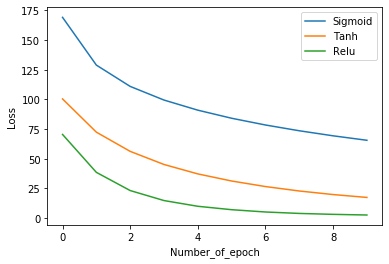

In [112]:
import matplotlib.pyplot as plt
plt.xlabel('Number_of_epoch')
plt.ylabel('Loss')
plt.plot(loss_box_Sigmoid, label = 'Sigmoid')
plt.plot(loss_box_Tanh, label = 'Tanh')
plt.plot(loss_box_Relu, label = 'Relu')
plt.legend()
plt.show()

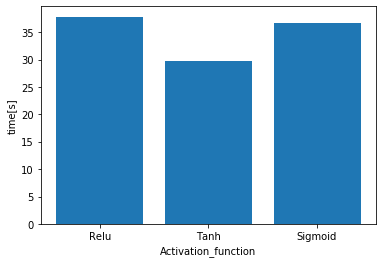

In [109]:
timelist = [37.8, 29.8, 36.6]
layerlist = ['Relu', 'Tanh', 'Sigmoid']

plt.xlabel('Activation_function')
plt.ylabel('time[s]')
plt.bar(layerlist, timelist)
plt.show()

# Reluが最もいい成果をだす。

## 層の変更　（２層、４層、6層）全部Relu

## ２層

In [87]:
class ScratchSimpleNeuralNetrowkClassifier():

        def __init__(self, verbose = True, epoch = 0 , alpha = 0.01, activater = Tanh,  initializer = SimpleInitializer, optimizer = SGD):
            self.verbose = verbose
            self.n_features = 784
            self.n_nodes1 = 400
            self.n_nodes2 = 200
            self.n_output = 10
            self.sigma = 0.01   # ガウス分布の標準偏差
            self.batch_size=10
            self.loss_box = []
            self.epoch = epoch
            self.lr = alpha
            self.activater = activater
            self.initializer = initializer
            self.optimizer = optimizer
            pass

        def fit(self, X, y, X_val=None, y_val=None):

            """
            初期値
            """
            # self.sigma : ガウス分布の標準偏差
            # self.lr : 学習率
            # self.n_nodes1 : 1層目のノード数
            # self.n_nodes2 : 2層目のノード数
            # self.n_output : 出力層のノード数
            optimizer = AdaGrad(self.lr)
            self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation1 = self.activater()
            self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation2 = self.activater()
            self.FC3 = FC(self.n_nodes2, self.n_output, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation3 = Softmax_with_Loss()
            """Get_mini_batch"""
            get_mini_batch = GetMiniBatch(X, y, self.batch_size)

            """エポック回イテレート"""
            for i in range(self.epoch):
                for mini_X_train, mini_y_train in get_mini_batch:

                    """
                    Forword
                    """
                    A1 = self.FC1.forward(mini_X_train)
                    Z1 = self.activation1.forward(A1)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
                    """
                    Backword
                    """
                    dA3 = self.activation3.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせてい
                    dZ2 = self.FC3.backward(dA3)
                    dA2 = self.activation2.backward(dZ2)
                    dZ1 = self.FC2.backward(dA2)
                    dA1 = self.activation1.backward(dZ1)
                    dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
                  
                """
                Forword  after optimized weight
                """
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                """
                Evaluation
                """
                print('__{}TIMES　of epoch__'.format(i+1))
                print('L0SS={}'.format(self.cross_entropy_loss(Z3, y)))
                print('ACCURACY_SCORE={}'.format(accuracy_score(y.argmax(1), Z3.argmax(1))))
                
                self.loss_box.append(self.cross_entropy_loss(Z3, y))

            if self.verbose:
                print()
                #verboseをTrueにした際は学習過程などを出力する
            return self.loss_box

        def cross_entropy_loss(self, final_Z, y):
            l =  -y*(np.log(final_Z))/self.batch_size
            L = l.sum()
            return L

        def predict(self, X):
            """
            Forword action after optimized weight
            """
            A1 = self.FC1.forward(X)
            Z1 = self.activation1.forward(A1)
            A2 = self.FC2.forward(Z1)
            Z2 = self.activation2.forward(A2)
            A3 = self.FC3.forward(Z2)
            Z3 = self.activation3.forward(A3)

            return Z3.argmax(1)

In [88]:
%%timeit -r １ -n 1
nnc = ScratchSimpleNeuralNetrowkClassifier(epoch = 3, alpha = 0.01, activater = Relu, initializer = He, optimizer = AdaGrad)

loss_box_2layer = nnc.fit(X_train[:4000], y_train[:4000])

y_pred = nnc.predict(X_val)

accuracy_score(y_val.argmax(1), y_pred)

__1TIMES　of epoch__
L0SS=70.33189913423583
ACCURACY_SCORE=0.952
__2TIMES　of epoch__
L0SS=38.380038494119894
ACCURACY_SCORE=0.9775
__3TIMES　of epoch__
L0SS=23.04850696066183
ACCURACY_SCORE=0.9915

9.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## ４層

In [89]:
class ScratchSimpleNeuralNetrowkClassifier():

        def __init__(self, verbose = True, epoch = 0 , alpha = 0.01, activater = Tanh,  initializer = SimpleInitializer, optimizer = SGD):
            self.verbose = verbose
            self.n_features = 784
            
            self.n_nodes1 = 700
            self.n_nodes2 = 500
            self.n_nodes3 = 300
            self.n_nodes4 = 100
            self.n_output = 10
            
            self.sigma = 0.01   # ガウス分布の標準偏差
            self.batch_size=10
            self.loss_box = []
            self.epoch = epoch
            self.lr = alpha
            self.activater = activater
            self.initializer = initializer
            self.optimizer = optimizer
            pass

        def fit(self, X, y, X_val=None, y_val=None):

            """
            初期値
            """
            # self.sigma : ガウス分布の標準偏差
            # self.lr : 学習率
            # self.n_nodes1 : 1層目のノード数
            # self.n_nodes2 : 2層目のノード数
            # self.n_output : 出力層のノード数
            optimizer = AdaGrad(self.lr)
            self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation1 = self.activater()
            self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation2 = self.activater()
            self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation3 = self.activater()
            self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation4 = self.activater()
            self.FC5 = FC(self.n_nodes4, self.n_output, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation5 = Softmax_with_Loss()
            
            """Get_mini_batch"""
            get_mini_batch = GetMiniBatch(X, y, self.batch_size)

            """エポック回イテレート"""
            for i in range(self.epoch):
                
                for mini_X_train, mini_y_train in get_mini_batch:

                    """
                    Forword
                    """
                    A1 = self.FC1.forward(mini_X_train)
                    Z1 = self.activation1.forward(A1)
#                     print(Z1.shape)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
#                     print(Z2.shape)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
#                     print(Z3.shape)
                    A4 = self.FC4.forward(Z3)
                    Z4 = self.activation4.forward(A4)
#                     print(Z4.shape)
                    A5 = self.FC5.forward(Z4)
                    Z5 = self.activation5.forward(A5)
#                     print(Z5.shape)
                    """
                    Backword
                    """
                    dA5 = self.activation5.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせてい
#                     print(dA5.shape)
                    dZ4 = self.FC5.backward(dA5)
                    dA4 = self.activation4.backward(dZ4)
#                     print(dA4.shape)
                    dZ3 = self.FC4.backward(dA4)
                    dA3 = self.activation3.backward(dZ3)
#                     print(dA3.shape)
                    dZ2 = self.FC3.backward(dA3)
                    dA2 = self.activation2.backward(dZ2)
#                     print(dA2.shape)
                    dZ1 = self.FC2.backward(dA2)
                    dA1 = self.activation1.backward(dZ1)
#                     print(dA1.shape)
                    dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
#                     print(dZ0.shape)
                """
                Forword  after optimized weight
                """
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)

                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)

                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)

                A4 = self.FC4.forward(Z3)
                Z4 = self.activation4.forward(A4)

                A5 = self.FC5.forward(Z4)
                Z5 = self.activation5.forward(A5)
#                 print(Z5.shape)

                """
                Evaluation
                """
                print('__{}TIMES　of epoch__'.format(i+1))
                print('L0SS={}'.format(self.cross_entropy_loss(Z5, y)))
                print('ACCURACY_SCORE={}'.format(accuracy_score(y.argmax(1), Z5.argmax(1))))
                
                self.loss_box.append(self.cross_entropy_loss(Z5, y))

            if self.verbose:
                print()
                #verboseをTrueにした際は学習過程などを出力する
            return self.loss_box

        def cross_entropy_loss(self, final_Z, y):
            l =  -y*(np.log(final_Z))/self.batch_size
            L = l.sum()
            return L

        def predict(self, X):
            """
            Forword action after optimized weight
            """
            A1 = self.FC1.forward(X)
            Z1 = self.activation1.forward(A1)

            A2 = self.FC2.forward(Z1)
            Z2 = self.activation2.forward(A2)

            A3 = self.FC3.forward(Z2)
            Z3 = self.activation3.forward(A3)

            A4 = self.FC4.forward(Z3)
            Z4 = self.activation4.forward(A4)

            A5 = self.FC5.forward(Z4)
            Z5 = self.activation5.forward(A5)

            return Z5.argmax(1)

In [90]:
%%timeit -r １ -n 1
nnc = ScratchSimpleNeuralNetrowkClassifier(epoch = 3, alpha = 0.01, activater = Relu, initializer = He, optimizer = AdaGrad)

loss_box_4layer = nnc.fit(X_train[:4000], y_train[:4000])

y_pred = nnc.predict(X_val)

accuracy_score(y_val.argmax(1), y_pred)

__1TIMES　of epoch__
L0SS=62.23176459754123
ACCURACY_SCORE=0.96
__2TIMES　of epoch__
L0SS=26.217821994208887
ACCURACY_SCORE=0.9825
__3TIMES　of epoch__
L0SS=13.739309645142779
ACCURACY_SCORE=0.99075

26.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 6層

In [93]:
class ScratchSimpleNeuralNetrowkClassifier():

        def __init__(self, verbose = True, epoch = 0 , alpha = 0.01, activater = Tanh,  initializer = SimpleInitializer, optimizer = SGD):
            self.verbose = verbose
            self.n_features = 784
            
            self.n_nodes1 = 700
            self.n_nodes2 = 600
            self.n_nodes3 = 500
            self.n_nodes4 = 400
            self.n_nodes5 = 300
            self.n_nodes6 = 150
            self.n_output = 10
            
            self.sigma = 0.01   # ガウス分布の標準偏差
            self.batch_size=10
            self.loss_box = []
            self.epoch = epoch
            self.lr = alpha
            self.activater = activater
            self.initializer = initializer
            self.optimizer = optimizer
            pass

        def fit(self, X, y, X_val=None, y_val=None):

            """
            初期値
            """
            # self.sigma : ガウス分布の標準偏差
            # self.lr : 学習率
            # self.n_nodes1 : 1層目のノード数
            # self.n_nodes2 : 2層目のノード数
            # self.n_output : 出力層のノード数
            optimizer = AdaGrad(self.lr)
            self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation1 = self.activater()
            
            self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation2 = self.activater()
            
            self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation3 = self.activater()
            
            self.FC4 = FC(self.n_nodes3, self.n_nodes4, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation4 = self.activater()
            
            self.FC5 = FC(self.n_nodes4, self.n_nodes5, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation5 = self.activater()
            
            self.FC6 = FC(self.n_nodes5, self.n_nodes6, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation6 = self.activater()
            
            self.FC7 = FC(self.n_nodes6, self.n_output, self.initializer(self.sigma), self.optimizer(self.lr))
            self.activation7 = Softmax_with_Loss()
            
            """Get_mini_batch"""
            get_mini_batch = GetMiniBatch(X, y, self.batch_size)

            """エポック回イテレート"""
            for i in range(self.epoch):
                
                for mini_X_train, mini_y_train in get_mini_batch:

                    """
                    Forword
                    """
                    A1 = self.FC1.forward(mini_X_train)
                    Z1 = self.activation1.forward(A1)
#                     print(Z1.shape)
                    A2 = self.FC2.forward(Z1)
                    Z2 = self.activation2.forward(A2)
#                     print(Z2.shape)
                    A3 = self.FC3.forward(Z2)
                    Z3 = self.activation3.forward(A3)
#                     print(Z3.shape)
                    A4 = self.FC4.forward(Z3)
                    Z4 = self.activation4.forward(A4)
#                     print(Z4.shape)
                    A5 = self.FC5.forward(Z4)
                    Z5 = self.activation5.forward(A5)
#                     print(Z3.shape)
                    A6 = self.FC6.forward(Z5)
                    Z6 = self.activation6.forward(A6)
#                     print(Z4.shape)
                    A7 = self.FC7.forward(Z6)
                    Z7 = self.activation7.forward(A7)
#                     print(Z5.shape)
                    """
                    Backword
                    """
                    dA7 = self.activation7.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせてい
#                     print(dA5.shape)
                    dZ6 = self.FC7.backward(dA7)
                    dA6 = self.activation6.backward(dZ6)
#                     print(dA4.shape)
                    dZ5 = self.FC6.backward(dA6)
                    dA5 = self.activation5.backward(dZ5)
#                     print(dA3.shape)
                    dZ4 = self.FC5.backward(dA5)
                    dA4 = self.activation4.backward(dZ4)
        
                    dZ3 = self.FC4.backward(dA4)
                    dA3 = self.activation3.backward(dZ3)
#                     print(dA3.shape)
                    dZ2 = self.FC3.backward(dA3)
                    dA2 = self.activation2.backward(dZ2)
#                     print(dA2.shape)
                    dZ1 = self.FC2.backward(dA2)
                    dA1 = self.activation1.backward(dZ1)
#                     print(dA1.shape)
                    dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
#                     print(dZ0.shape)
                """
                Forword  after optimized weight
                """
                A1 = self.FC1.forward(X)
                Z1 = self.activation1.forward(A1)
#                     print(Z1.shape)
                A2 = self.FC2.forward(Z1)
                Z2 = self.activation2.forward(A2)
#                     print(Z2.shape)
                A3 = self.FC3.forward(Z2)
                Z3 = self.activation3.forward(A3)
#                     print(Z3.shape)
                A4 = self.FC4.forward(Z3)
                Z4 = self.activation4.forward(A4)
#                     print(Z4.shape)
                A5 = self.FC5.forward(Z4)
                Z5 = self.activation5.forward(A5)
#                     print(Z3.shape)
                A6 = self.FC6.forward(Z5)
                Z6 = self.activation6.forward(A6)
#                     print(Z4.shape)
                A7 = self.FC7.forward(Z6)
                Z7 = self.activation7.forward(A7)

                """
                Evaluation
                """
                print('__{}TIMES　of epoch__'.format(i+1))
                print('L0SS={}'.format(self.cross_entropy_loss(Z7, y)))
                print('ACCURACY_SCORE={}'.format(accuracy_score(y.argmax(1), Z7.argmax(1))))
                
                self.loss_box.append(self.cross_entropy_loss(Z7, y))

            if self.verbose:
                print()
                #verboseをTrueにした際は学習過程などを出力する
            return self.loss_box

        def cross_entropy_loss(self, final_Z, y):
            l =  -y*(np.log(final_Z))/self.batch_size
            L = l.sum()
            return L

        def predict(self, X):
            """
            Forword action after optimized weight
            """
            A1 = self.FC1.forward(X)
            Z1 = self.activation1.forward(A1)
#                     print(Z1.shape)
            A2 = self.FC2.forward(Z1)
            Z2 = self.activation2.forward(A2)
#                     print(Z2.shape)
            A3 = self.FC3.forward(Z2)
            Z3 = self.activation3.forward(A3)
#                     print(Z3.shape)
            A4 = self.FC4.forward(Z3)
            Z4 = self.activation4.forward(A4)
#                     print(Z4.shape)
            A5 = self.FC5.forward(Z4)
            Z5 = self.activation5.forward(A5)
#                     print(Z3.shape)
            A6 = self.FC6.forward(Z5)
            Z6 = self.activation6.forward(A6)
#                     print(Z4.shape)
            A7 = self.FC7.forward(Z6)
            Z7 = self.activation7.forward(A7)

            return Z7.argmax(1)

In [94]:
%%timeit -r １ -n 1
nnc = ScratchSimpleNeuralNetrowkClassifier(epoch = 3, alpha = 0.01, activater = Relu, initializer = He, optimizer = AdaGrad)

loss_box_6layer = nnc.fit(X_train[:4000], y_train[:4000])

y_pred = nnc.predict(X_val)

accuracy_score(y_val.argmax(1), y_pred)

__1TIMES　of epoch__
L0SS=83.54685518459122
ACCURACY_SCORE=0.9415
__2TIMES　of epoch__
L0SS=38.15468123340608
ACCURACY_SCORE=0.97175
__3TIMES　of epoch__
L0SS=18.74948740841072
ACCURACY_SCORE=0.98675

1min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


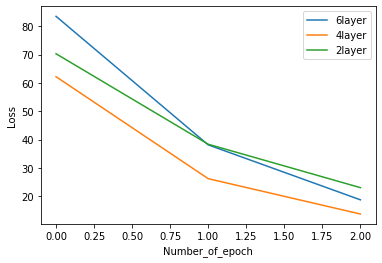

In [95]:
import matplotlib.pyplot as plt
plt.xlabel('Number_of_epoch')
plt.ylabel('Loss')
plt.plot(loss_box_6layer, label = '6layer')
plt.plot(loss_box_4layer, label = '4layer')
plt.plot(loss_box_2layer, label = '2layer')
plt.legend()
plt.show()

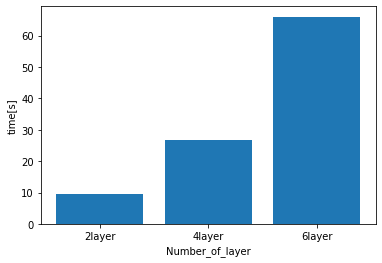

In [110]:
timelist = [9.4, 26.8, 66]
layerlist = ['2layer', '4layer', '6layer']

plt.xlabel('Number_of_layer')
plt.ylabel('time[s]')
plt.bar(layerlist, timelist)
plt.show()

## そうを増やすより、エポック数を増やした方が良い結果が得られる。